In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("/Users/wejarrard/projects/tf-binding/figures/data/tobias_results.csv")
df = df.groupby('tf').filter(lambda x: len(x) > 2)

In [4]:
df_grouped = df.groupby('cell_line')['total_predictions'].sum().reset_index()
df_grouped_sorted = df_grouped.sort_values(by='total_predictions', ascending=False)

# Create the bar chart
fig = px.bar(df_grouped_sorted, x='cell_line', y='total_predictions',
             title='Total predictions by Cell Line',
             labels={'tf': 'Transcription Factor', 'accuracy': 'Total predictions'})

# Show the figure
fig.show()

In [5]:
# Group by 'tf' and calculate the mean accuracy for each group
df_grouped = df.groupby('cell_line')['accuracy'].mean().reset_index()

# Sort the grouped DataFrame by accuracy in descending order
df_grouped_sorted = df_grouped.sort_values(by='accuracy', ascending=False)
# df_grouped_sorted[df_grouped_sorted['total_predictions'] > 1000]

# Create the bar chart
fig = px.bar(df_grouped_sorted, x='cell_line', y='accuracy',
             title='Mean Accuracy by Cell Line',
             labels={'tf': 'Transcription Factor', 'accuracy': 'Mean Accuracy'})

# Show the figure
fig.show()

In [6]:
df['correct_predictions'] = df['total_predictions'] * df['accuracy']
# sum correct predictions by tf, and get total predictions as ewll
df_grouped = df.groupby('cell_line').agg({'correct_predictions': 'sum', 'total_predictions': 'sum'}).reset_index()
df_grouped['accuracy'] = df_grouped['correct_predictions'] / df_grouped['total_predictions']
df_grouped_sorted = df_grouped.sort_values(by='accuracy', ascending=False)

# Create the bar chart
fig = px.bar(df_grouped_sorted, x='cell_line', y='accuracy',
             title='Accuracy by Cell Line',
             labels={'cell_line': 'Transcription Factor', 'accuracy': 'Accuracy'})

# Show the figure
fig.show()


In [7]:
df_grouped = df.groupby('tf')['total_predictions'].sum().reset_index()
df_grouped_sorted = df_grouped.sort_values(by='total_predictions', ascending=False)

# Create the bar chart
fig = px.bar(df_grouped_sorted, x='tf', y='total_predictions',
             title='Total predictions by TF',
             labels={'tf': 'Transcription Factor', 'accuracy': 'Total predictions'})

# Show the figure
fig.show()

In [8]:
# Get tfs with total predictions < 1000
df_grouped_sorted[df_grouped_sorted['total_predictions'] < 1000]

,tf,total_predictions
20,STAT2,159


In [9]:


# drop tfs with total predictions < 1000 in original df
df = df[~df['tf'].isin(df_grouped_sorted[df_grouped_sorted['total_predictions'] < 1000]['tf'])]
df

,tf,cell_line,accuracy,total_predictions,false_positives,true_negatives,false_negatives,true_positives,correct_predictions
1,ELF1,A549,0.700416,7210,2099,1273,61,3777,5050.0
2,ELF1,SK-N-SH,0.475129,7358,3788,1403,74,2093,3496.0
3,ELF1,MCF7,0.663101,7572,2507,1253,44,3768,5021.0
7,RXRA,THP-1,0.863158,95,10,77,3,5,82.0
8,RXRA,SK-N-SH,0.688589,4592,1176,2736,254,426,3162.0
...,...,...,...,...,...,...,...,...,...
132,RUNX1,LNCAP,0.857143,35,1,29,4,1,30.0
133,CREB1,A549,0.718489,2515,688,597,20,1210,1807.0
134,CREB1,AN3_CA,0.699953,2113,625,313,9,1166,1479.0
135,CREB1,MCF7,0.491269,4238,2141,468,15,1614,2082.0


In [10]:
# Group by 'tf' and sum 'total_predictions'
df_grouped_normalized = df.groupby('tf')['total_predictions'].sum().reset_index()

# Get the number of unique 'cell_line' for each 'tf'
num_cell_lines = df.groupby('tf')['cell_line'].nunique().reset_index()

# Merge the 'num_cell_lines' with 'df_grouped_normalized' based on 'tf'
df_grouped_normalized = df_grouped_normalized.merge(num_cell_lines, on='tf', how='left')

# Rename the column appropriately
df_grouped_normalized.rename(columns={'cell_line': 'num_cell_lines'}, inplace=True)

# Calculate the normalized predictions
df_grouped_normalized['total_predictions_normalized'] = df_grouped_normalized['total_predictions'] / df_grouped_normalized['num_cell_lines']


# Sort the dataframe based on 'total_predictions_normalized'
df_grouped_normalized_sorted = df_grouped_normalized.sort_values(by='total_predictions_normalized', ascending=False)

# Create the bar chart
fig = px.bar(df_grouped_normalized_sorted, x='tf', y='total_predictions_normalized',
             title='Average number of predictions per cell line by TF',
                labels={'tf': 'Transcription Factor', 'accuracy': 'Total predictions normalized'})


# Show the figure
fig.show()

In [11]:
# Group by 'tf' and calculate the mean accuracy for each group
df_grouped = df.groupby('tf')['accuracy'].mean().reset_index()

# Sort the grouped DataFrame by accuracy in descending order
df_grouped_sorted = df_grouped.sort_values(by='accuracy', ascending=False)
# df_grouped_sorted[df_grouped_sorted['total_predictions'] > 1000]

# Create the bar chart
fig = px.bar(df_grouped_sorted, x='tf', y='accuracy',
             title='Mean Accuracy by TF',
             labels={'tf': 'Transcription Factor', 'accuracy': 'Mean Accuracy'})

# Show the figure
fig.show()

In [12]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming df is your DataFrame containing 'tf', 'total_predictions', and 'accuracy'

# Calculate mean accuracy and standard deviation by TF
df_grouped = df.groupby('tf')['accuracy'].agg(['mean', 'std']).reset_index()

# Sort the grouped DataFrame by mean accuracy in descending order
df_grouped_sorted = df_grouped.sort_values(by='mean', ascending=False)

# Create the bar chart with error bars for standard deviation
fig = px.bar(df_grouped_sorted, x='tf', y='mean', 
             error_y='std', # Error bars represent the standard deviation
             title='Mean Accuracy with Standard Deviation by TF',
             labels={'tf': 'Transcription Factor', 'mean': 'Mean Accuracy'})

# Show the figure
fig.show()


In [13]:
df['correct_predictions'] = df['total_predictions'] * df['accuracy']
# sum correct predictions by tf, and get total predictions as ewll
df_grouped = df.groupby('tf').agg({'correct_predictions': 'sum', 'total_predictions': 'sum'}).reset_index()
df_grouped['accuracy'] = df_grouped['correct_predictions'] / df_grouped['total_predictions']
df_grouped_sorted = df_grouped.sort_values(by='accuracy', ascending=False)

# Create the bar chart
fig = px.bar(df_grouped_sorted, x='tf', y='accuracy',
             title='Accuracy by TF',
             labels={'tf': 'Transcription Factor', 'accuracy': 'Accuracy'})

# Show the figure
fig.show()


In [14]:
df_grouped_sorted

,tf,correct_predictions,total_predictions,accuracy
9,FOXM1,12262.0,15434,0.794480
19,SP1,63753.0,85435,0.746216
18,RXRA,4184.0,5952,0.702957
12,JUNB,6793.0,9960,0.682028
6,FOSL2,26170.0,39548,0.661728
3,EGR1,16910.0,25571,0.661296
20,TAF1,61988.0,94125,0.658571
17,RUNX1,19682.0,30725,0.640586
13,JUND,25556.0,40216,0.635468
22,TEAD4,12765.0,20690,0.616965


In [15]:
# get tf foxm1 cell line mcf7
specific_cell_line = df[df['tf'] == 'FOXM1']
specific_cell_line
specific_cell_line.sort_values(by='accuracy', ascending=False)

,tf,cell_line,accuracy,total_predictions,false_positives,true_negatives,false_negatives,true_positives,correct_predictions
44,FOXM1,HELA,0.870879,364,41,271,6,46,317.0
48,FOXM1,HEK_293,0.863520,784,89,637,18,40,677.0
42,FOXM1,A549,0.852459,61,7,51,2,1,52.0
47,FOXM1,HuH-7,0.847107,484,41,403,33,7,410.0
46,FOXM1,MDA-MB-231,0.820696,3073,442,2221,109,301,2522.0
45,FOXM1,SK-N-SH,0.817055,2017,289,1547,80,101,1648.0
43,FOXM1,AN3_CA,0.793658,2176,398,1541,51,186,1727.0
49,FOXM1,MCF7,0.758147,6475,1456,2691,110,2218,4909.0


In [16]:
# get median accuracy of foxm1
specific_cell_line.sort_values(by='accuracy', ascending=False).iloc[int(len(specific_cell_line)/2),:]['cell_line']


'MDA-MB-231'

In [17]:
# get tobias from dataframe
tobias = df[df['tf'] == 'FOXM1']
tobias = tobias[tobias['cell_line'] == 'MDA-MB-231']
tobias


,tf,cell_line,accuracy,total_predictions,false_positives,true_negatives,false_negatives,true_positives,correct_predictions
46,FOXM1,MDA-MB-231,0.820696,3073,442,2221,109,301,2522.0


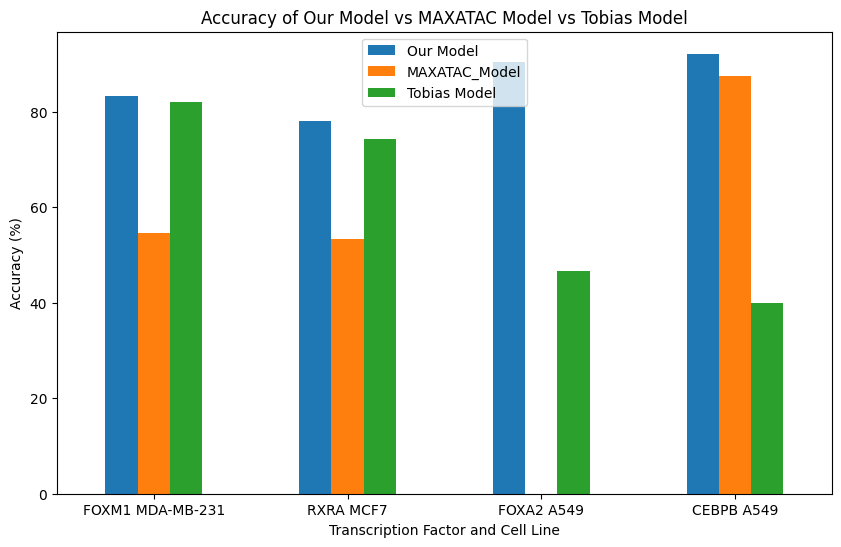

In [4]:
# Make graph comparing accuracy for cell line tf to our model cell line tf
# Our model we have CEBPB A549: 92.1677% accurate
# Tobias model CEBPB A549: 39.8738% accurate
# Our model RXRA MCF7: 78.1082% accurate
# Tobias model RXRA MCF7: 74.3083% accurate
# Our model FOXM1 MDA-MB-231: 83.3302% accurate
# Tobias model FOXM1 MDA-MB-231: 82.0696% accurate
# Our model FOXA2 A549: 90.4345% accurate
# Tobias model FOXA2 A549: 46.7213% accurate

# Make graph comparing accuracy for cell line tf to our model cell line tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame
data = {
    'tf': ['FOXM1 MDA-MB-231', 'RXRA MCF7' , 'FOXA2 A549', 'CEBPB A549'],
    'our_model_accuracy': [83.3302, 78.1082, 90.4345, 92.1677],
    'MAXATAC_accuracy': [54.57, 53.40, np.nan, 87.56],
    'tobias_model_accuracy': [82.0696 ,74.3083, 46.7213, 39.8738]
}

df = pd.DataFrame(data)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind='bar', x='tf', ax=ax)

ax.set_title('Accuracy of Our Model vs MAXATAC Model vs Tobias Model')
ax.set_xlabel('Transcription Factor and Cell Line')
ax.set_ylabel('Accuracy (%)')
ax.legend(['Our Model', 'MAXATAC_Model', 'Tobias Model'])

plt.xticks(rotation=0)
plt.show()
